# Parallel Coordinate Plot : Basic Usage Example

- Generate a static image of Parallel coordinate plot using Matplotlib.
- Author: Jiwoo Lee (2021-07)

## 1. Generate a dummy data

In [1]:
import numpy as np

# create some dummy data
N1, N2, N3 = 10, 5, 8
N = N1 + N2 + N3
category = np.concatenate([np.full(N1, 1), np.full(N2, 2), np.full(N3, 3)])
y1 = np.random.uniform(0, 10, N) + 7 * category
y2 = np.sin(np.random.uniform(0, np.pi, N)) ** category
y3 = np.random.binomial(300, 1 - category / 10, N)
y4 = np.random.binomial(200, (category / 6) ** 1/3, N)
y5 = np.random.uniform(0, 800, N)
y6 = np.random.uniform(0, 500, N)

# organize the data
data = np.dstack([y1, y2, y3, y4, y5, y6])[0]  # 2-D numpy array
metric_names = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6']  # metric list (x-axis)
model_names = ['Model '+str(n) for n in range(data.shape[0])]  # models 
model_highlights = ['Model 0', 'Model 7']  # models to highlight by lines

In [2]:
print('data.shape: ', data.shape)
print('metric_names: ', metric_names)
print('model_names: ', model_names)

data.shape:  (23, 6)
metric_names:  ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6']
model_names:  ['Model 0', 'Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7', 'Model 8', 'Model 9', 'Model 10', 'Model 11', 'Model 12', 'Model 13', 'Model 14', 'Model 15', 'Model 16', 'Model 17', 'Model 18', 'Model 19', 'Model 20', 'Model 21', 'Model 22']


## 2. Plot

In [3]:
from pcmdi_metrics.graphics import parallel_coordinate_plot

Parameters
----------
- `data`: 2-d numpy array for metrics
- `metric_names`: list, names of metrics for individual vertical axes (axis=1)
- `model_names`: list, name of models for markers/lines (axis=0)
- `model_highlights`: list, default=None, List of models to highlight as lines
- `fig`: `matplotlib.figure` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `ax`: `matplotlib.axes.Axes` instance to which the parallel coordinate plot is plotted.  If not provided, use current axes or create a new one.  Optional.
- `figsize`: tuple (two numbers), default=(15,5), image size
- `show_boxplot`: bool, default=True, show box and wiskers plot
- `show_violin`: bool, default=True, show violin plot
- `title`: string, default=None, plot title
- `identify_all_models`: bool, default=True. Show and identify all models using markers
- `xtick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `ytick_labelsize`: number, fontsize for x-axis tick labels (optional)
- `colormap`: string, default='viridis', matplotlib colormap
- `logo_rect`: sequence of float. The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.  Optional
- `logo_off`: bool, default=False, turn off PMP logo

Return
------
- `fig`: matplotlib component for figure
- `ax`: matplotlib component for axis

## 3. Usage example

- Default plot

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

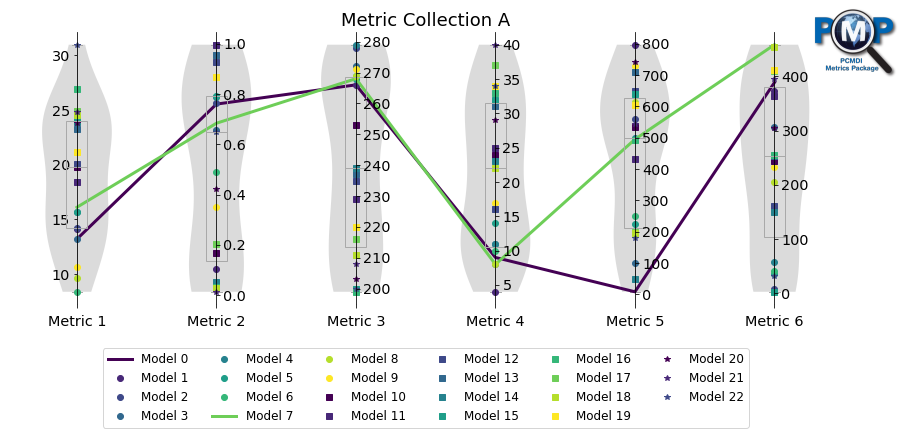

In [4]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A')

- Hide other models as individuals but show their population distribution only by `identify_all_models=False`

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

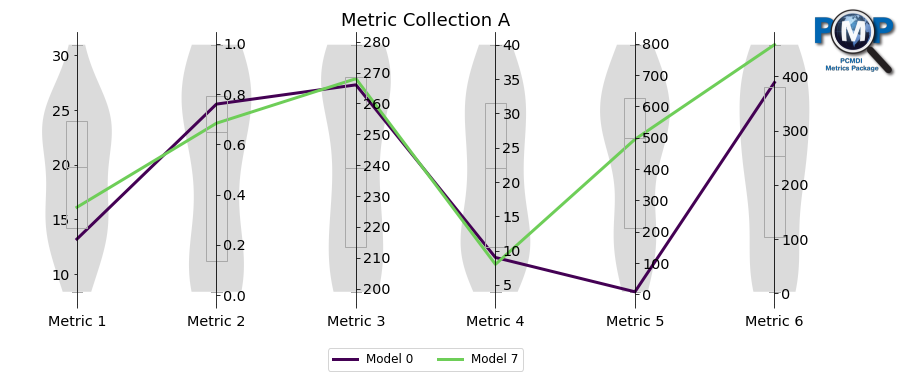

In [5]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A', 
                         identify_all_models=False)

- Turn off box plot but still show violin plot by `show_boxplot=False`

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

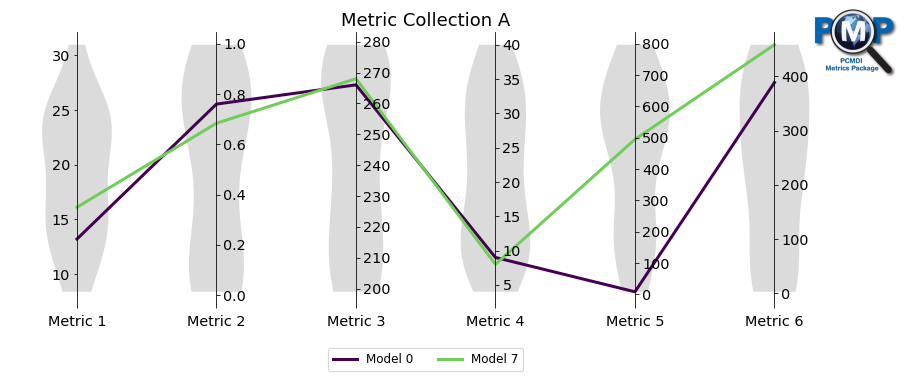

In [6]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A', 
                         show_boxplot=False, identify_all_models=False)

- Show both box plot but turn off violin plot by `show_boxplot=True` and `show_violin=False`

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

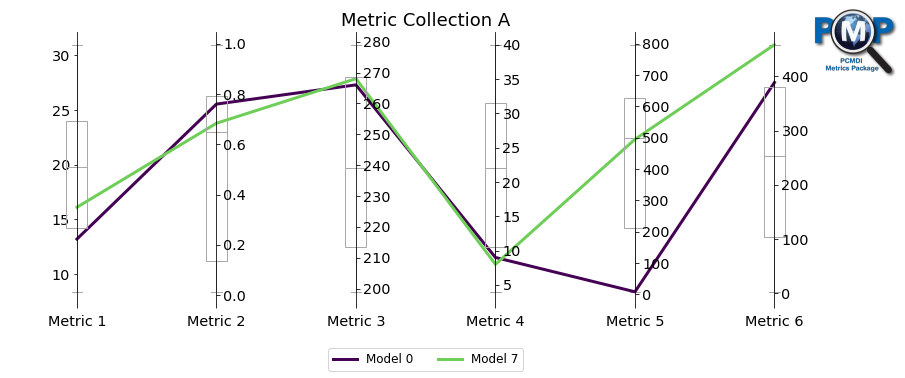

In [7]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A',
                         show_boxplot=True, show_violin=False, identify_all_models=False)

- Turn off both box and violin plots by `show_boxplot=False` and `show_violin=False`

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

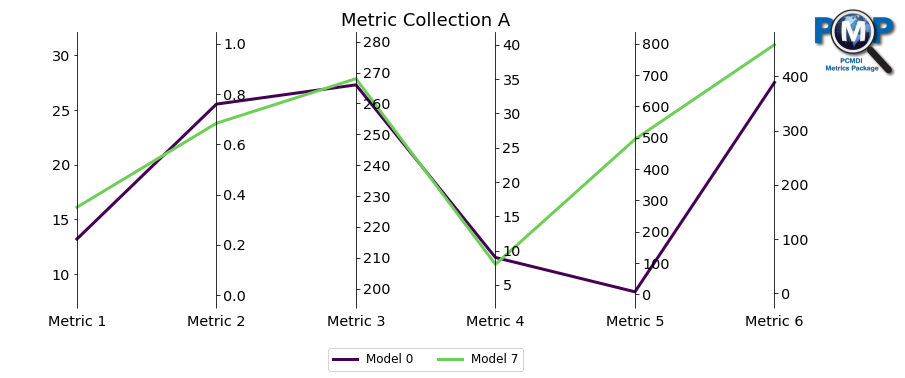

In [8]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A',
                         show_boxplot=False, show_violin=False, identify_all_models=False)

- While not showing box and violin plots, still show other models as individuals by `show_boxplot=False, show_violin=False, identify_all_models=True`

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

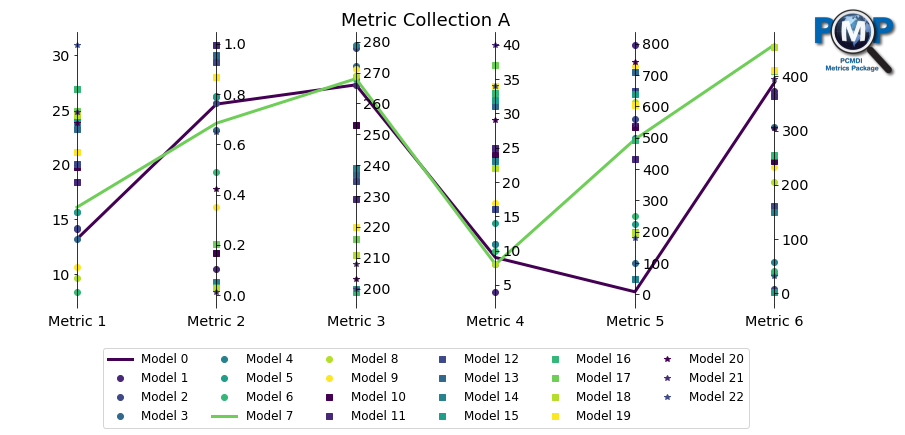

In [9]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A',
                         show_boxplot=False, show_violin=False, identify_all_models=True)

- Use different [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

(<Figure size 1080x360 with 7 Axes>,
 <AxesSubplot:title={'center':'Metric Collection A'}>)

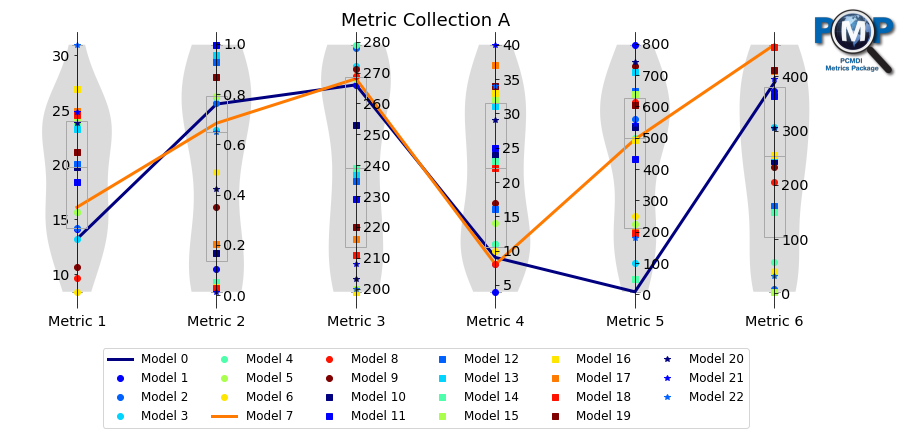

In [10]:
parallel_coordinate_plot(data, metric_names, model_names, model_highlights, title='Metric Collection A',
                         colormap='jet')

### Multi-panel plot
- You can make also a multi-panel plot

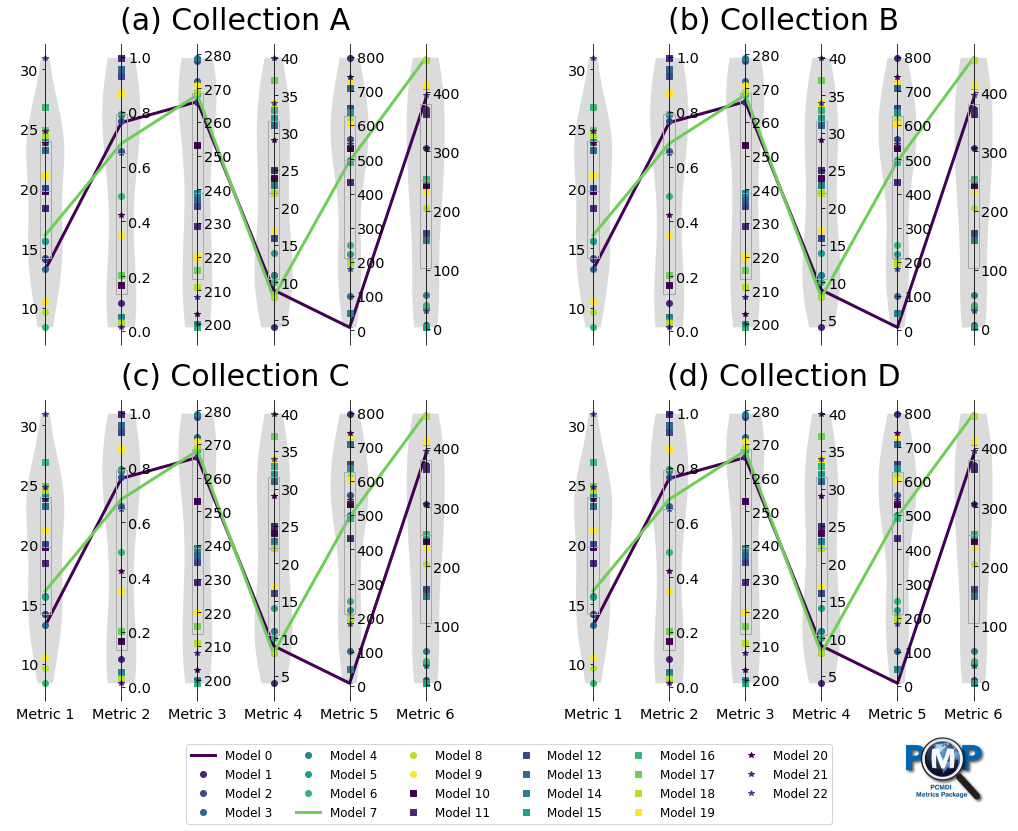

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18,12))

parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                         fig=fig, ax=ax[0,0], legend_off=True, logo_off=True)
ax[0,0].set_title('(a) Collection A', fontsize=30, pad=15)
ax[0,0].set_xticklabels([])

parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                         fig=fig, ax=ax[0,1], legend_off=True, logo_off=True)
ax[0,1].set_title('(b) Collection B', fontsize=30, pad=15)
ax[0,1].set_xticklabels([])

parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                         fig=fig, ax=ax[1,0], legend_off=True, logo_off=True)
ax[1,0].set_title('(c) Collection C', fontsize=30, pad=15)

parallel_coordinate_plot(data, metric_names, model_names, model_highlights, 
                         fig=fig, ax=ax[1,1], legend_off=True, logo_rect=[0.8, 0.0, 0.08, 0.08])
ax[1,1].set_title('(d) Collection D', fontsize=30, pad=15)

ax[1,1].legend(loc='upper center', ncol=6, bbox_to_anchor=(-0.1, -0.14))
plt.subplots_adjust(wspace=0.2, hspace=0.2)

plt.show()